![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
# importamos librerias y cargamos el dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data2.csv')

Separen el dataset en X, y (variable objetivo)

In [2]:
X = data.iloc[:, :-1]
X = pd.get_dummies(X)
y = data.iloc[:, -1]
y.replace("SI", 1, inplace=True)
y.replace("NO", 0, inplace=True)

In [3]:
print(X.shape)
print(y.shape)

(565, 19)
(565,)


In [4]:
X["PSA"].fillna(X["PSA"].mean(), inplace=True)

In [5]:
from imblearn.combine import SMOTETomek
from collections import Counter # Para contar los valores de una lista o array 

# Balanceamos los datos con SMOTETomek y contamos los valores de c/categoria
kounter = Counter(y)
print('antes',kounter)
rus = SMOTETomek(random_state=0)

xb, yb = rus.fit_resample(X,y)

kounter = Counter(yb)
print('despues',kounter)


antes Counter({0: 541, 1: 24})
despues Counter({1: 538, 0: 538})


In [6]:
x2 = xb[['AGENTE AISLADO_E.COLI','AGENTE AISLADO_NO', 'AGENTE AISLADO_PSEUDOMONAS AERUGINOSA', 'PATRON DE RESISTENCIA_NO', 'PATRON DE RESISTENCIA_SI']]

Separen el dataset en X_train, X_test, y_train y y_test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xb,yb, test_size=0.30, random_state=0, stratify= yb)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.30, random_state=0)

X_train3, X_test3, y_train3, y_test3 = train_test_split(x2,yb, test_size=0.30, random_state=0, stratify= yb)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [8]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(random_state=0, max_depth=4 ,criterion="gini") #Creo un arbol de decision con la metrica gini

arbol.fit(X_train, y_train) # Entreno el modelo

DecisionTreeClassifier(max_depth=4, random_state=0)

In [9]:
arbol3 = DecisionTreeClassifier(random_state=0, criterion="gini") #Creo un arbol de decision con la metrica gini

arbol3.fit(X_train3, y_train3) # Entreno el modelo

DecisionTreeClassifier(random_state=0)

In [10]:
arbol2 = DecisionTreeClassifier(random_state=0)
arbol2.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=0)

In [11]:
y_pred = arbol.predict(X_test)
yp = arbol.predict(X_test)

In [12]:
y_pred2 = arbol2.predict(X_test2)
yp2 = arbol2.predict(X_test2)

In [13]:
y_pred3 = arbol3.predict(X_test3)
yp3 = arbol3.predict(X_test3)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

**Accuracy (Exactitud):**

* Definición: La exactitud mide la proporción de predicciones correctas sobre el total de predicciones realizadas.
* Uso: Es una métrica generalmente utilizada para evaluar el rendimiento global del modelo.
* Consideraciones: Puede ser útil cuando las clases están balanceadas en el conjunto de datos. Sin embargo, puede ser engañosa cuando hay clases desbalanceadas.

**Precision (Precisión):**

* Definición: La precisión mide la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo.
* Uso: Es útil cuando el coste de los falsos positivos es alto, es decir, cuando deseas minimizar los falsos positivos.
* Consideraciones: No tiene en cuenta los falsos negativos.

**Recall (Recuperación o Sensibilidad):**

* Definición: El recall mide la proporción de predicciones positivas correctas sobre el total de casos positivos reales en el conjunto de datos.
* Uso: Es útil cuando el coste de los falsos negativos es alto, es decir, cuando deseas minimizar los falsos negativos.
* Consideraciones: No tiene en cuenta los falsos positivos.

**F1-Score:**

* Definición: El F1-Score es la media armónica de la precisión y el recall. Es una medida balanceada entre precisión y recuperación.
* Uso: Es útil cuando deseas tener un equilibrio entre la precisión y el recall.
* Consideraciones: Es especialmente útil cuando las clases están desbalanceadas.

**ROC-AUC:**

* Definición: El Área bajo la curva ROC (Receiver Operating Characteristic) mide la capacidad del modelo para discriminar * entre clases positivas y negativas en diferentes umbrales de clasificación.
* Uso: Es útil cuando deseas evaluar el rendimiento del modelo en diferentes umbrales de clasificación.
Consideraciones: Es una métrica efectiva incluso cuando las clases están desbalanceadas.

**Matriz de Confusión:**

* Definición: La matriz de confusión muestra el número de predicciones correctas e incorrectas realizadas por el modelo.
* Uso: Proporciona una visión detallada del rendimiento del modelo, mostrando los tipos de errores que comete.
* Consideraciones: Es una herramienta visual que complementa otras métricas de evaluación.

Accuracy: 0.9752321981424149
Precision: 0.9636363636363636
Recall: 0.9875776397515528
F1 score: 0.9754601226993865
Roc-Auc: 0.9752703013572579


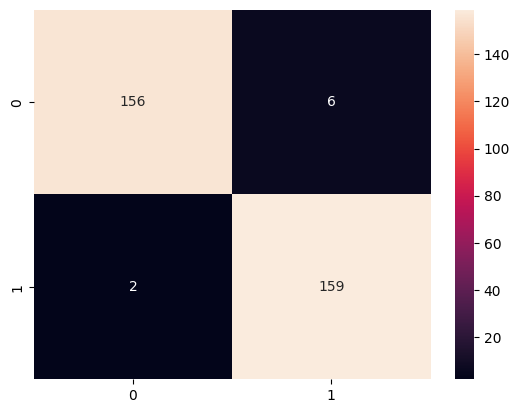

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, fmt="d" ,annot=True)


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print(f"Roc-Auc: {roc_auc_score(y_test, y_pred)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Roc-Auc: 1.0


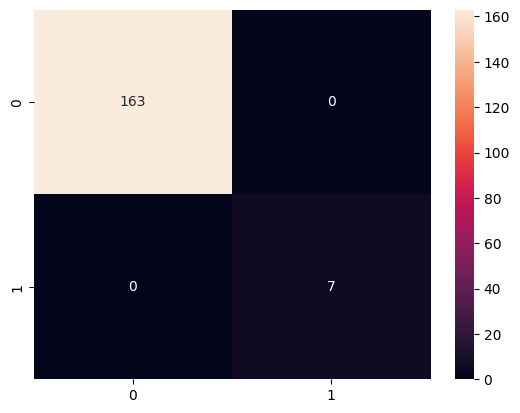

In [15]:
cm2 = confusion_matrix(y_test2, yp2)

plt.figure()
sns.heatmap(cm2, fmt="d" ,annot=True)


print(f"Accuracy: {accuracy_score(y_test2, yp2)}")
print(f"Precision: {precision_score(y_test2, yp2)}")
print(f"Recall: {recall_score(y_test2, yp2)}")
print(f"F1 score: {f1_score(y_test2, yp2)}")
print(f"Roc-Auc: {roc_auc_score(y_test2, yp2)}")

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [16]:
#max_depth -> Controlamos la profundidad/complejidad del árbol limitando su crecimiento,
#indica la cantidad de niveles que va a tener

#gini/entropy (criterion)-> Sirve para medir la pureza de cada nodo. Mientras más pureza, más acertado es

#random_state -> Sirve para que el árbol tome aleatoriamente unos valores de la misma forma cada vez que se ejecute
# Así podemos contrastar sus resultados con otras modificaciones que hagamos, cerciorandonos que usa los mismos datos

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [17]:
from sklearn import tree
col = X_test3.columns
importancias = arbol3.feature_importances_


print("Importacia de las características del modelo:")
for nombre, imptc in zip(col, importancias):
    print(f"{nombre}: {round(imptc,2)}")

# En este modelo se aislaron las variables más importantes y observamos que si excluimos la fiebre, el patrón de resistencia
# posee mucha relevancia a la hora de determinar si va a ser hospitalizado o no. Tambien posee importancia la presencia
# del E.Coli a la hora de la biopsia.

Importacia de las características del modelo:
AGENTE AISLADO_E.COLI: 0.06
AGENTE AISLADO_NO: 0.02
AGENTE AISLADO_PSEUDOMONAS AERUGINOSA: 0.0
PATRON DE RESISTENCIA_NO: 0.0
PATRON DE RESISTENCIA_SI: 0.92


Accuracy: 0.7523219814241486
Precision: 1.0
Recall: 0.5031055900621118
F1 score: 0.6694214876033058
Roc-Auc: 0.7515527950310559


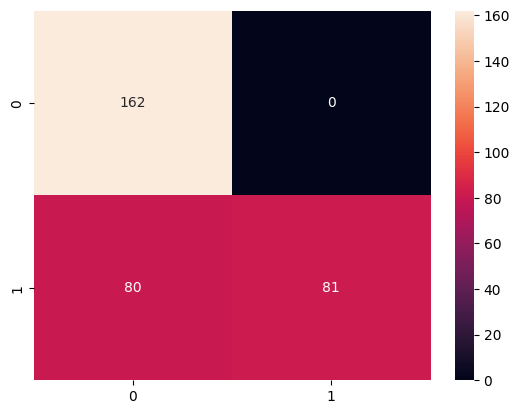

In [18]:
cm3 = confusion_matrix(y_test3, yp3)

plt.figure()
sns.heatmap(cm3, fmt="d" ,annot=True)


print(f"Accuracy: {accuracy_score(y_test3, yp3)}")
print(f"Precision: {precision_score(y_test3, yp3)}")
print(f"Recall: {recall_score(y_test3, yp3)}")
print(f"F1 score: {f1_score(y_test3, yp3)}")
print(f"Roc-Auc: {roc_auc_score(y_test3, yp3)}")

Importacia de las características del modelo:
EDAD: 0.02
PSA: 0.0
ANTIBIOTICO UTILIZADO_CEFALOSPORINA AMINOGLUCOCIDO: 0.0
ANTIBIOTICO UTILIZADO_FLUOROQUINOLONA AMINOGLICOSIDO: 0.0
ANTIBIOTICO UTILIZADO_OROQUINOLONAS: 0.0
ANTIBIOTICO UTILIZADO_OTROS: 0.01
FIEBRE_NO: 0.0
FIEBRE_SI: 0.97
ITU_NO: 0.0
ITU_SI: 0.0
TIPO DE CULTIVO_HEMOCULTIVO: 0.0
TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO: 0.0
TIPO DE CULTIVO_NO: 0.0
TIPO DE CULTIVO_UROCULTIVO: 0.0
AGENTE AISLADO_E.COLI: 0.0
AGENTE AISLADO_NO: 0.0
AGENTE AISLADO_PSEUDOMONAS AERUGINOSA: 0.0
PATRON DE RESISTENCIA_NO: 0.0
PATRON DE RESISTENCIA_SI: 0.0


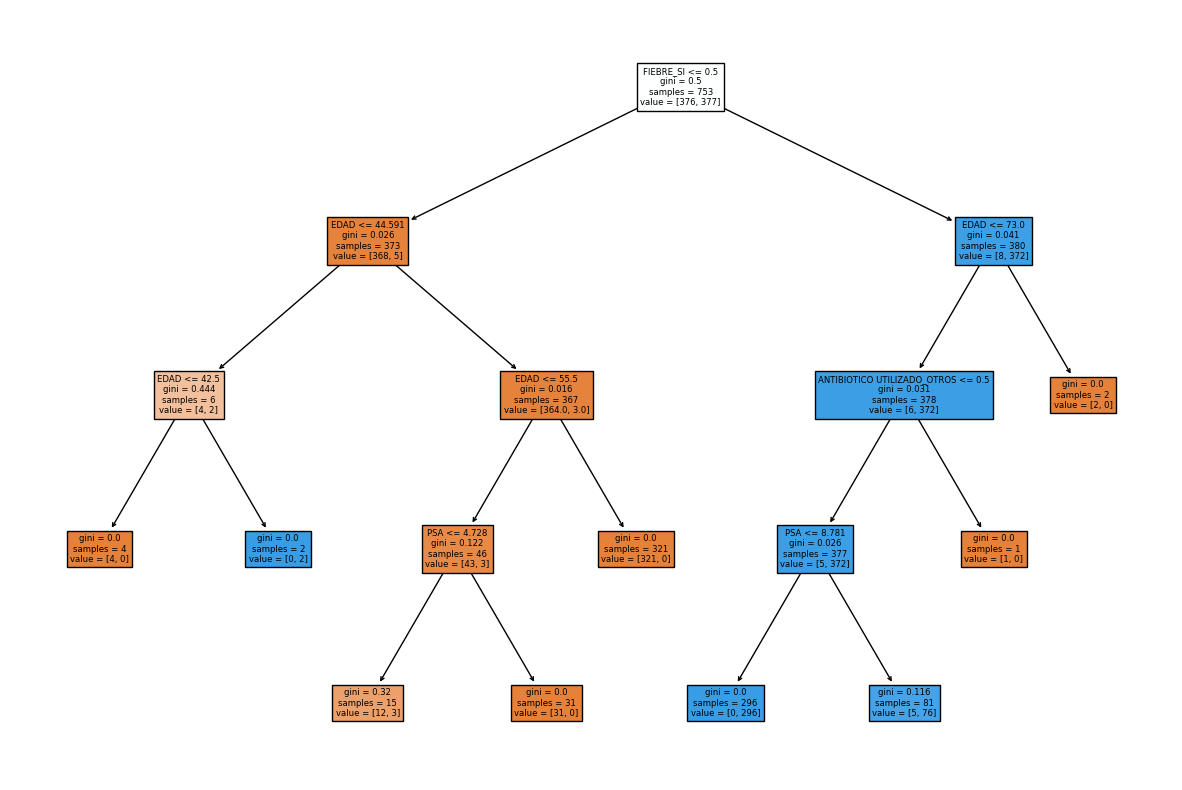

In [19]:
from sklearn import tree
col = X_test.columns
importancias = arbol.feature_importances_


print("Importacia de las características del modelo:")
for nombre, imptc in zip(col, importancias):
    print(f"{nombre}: {round(imptc,2)}")


plt.figure(figsize=(15,10))
tree.plot_tree(arbol, filled=True, feature_names=col)
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

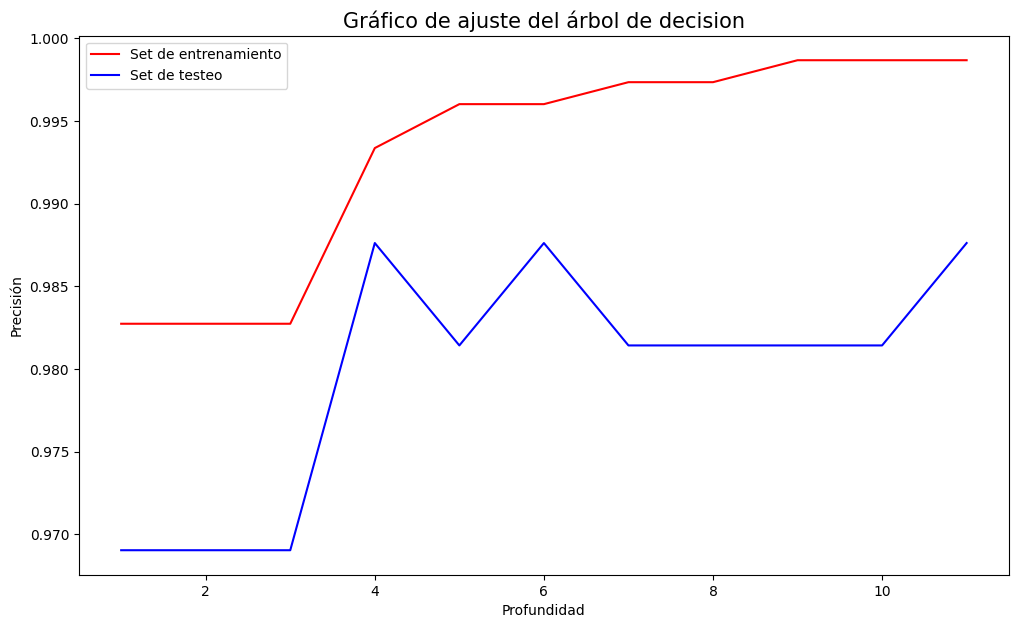

In [20]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 12,1))

for deep in max_deep_list:
    clfe = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clfe.fit(X_train, y_train)
    train_prec.append(clfe.score(X_train, y_train))
    eval_prec.append(clfe.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Profundidad')
plt.show()

Podemos ver que la profundidad optima es de 3 ya que a partir de ahí hay un estancamiento. A 10 mejora, pero no es muy significativo, entonces se decide optar por un max_depth de 3

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = "hamming")  #metric = 'Hamming' se utiliza para variables categoricas
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='hamming')

Accuracy: 0.9721362229102167
Precision: 0.9578313253012049
Recall: 0.9875776397515528
F1 score: 0.9724770642201835
Roc-Auc: 0.9721838816041715


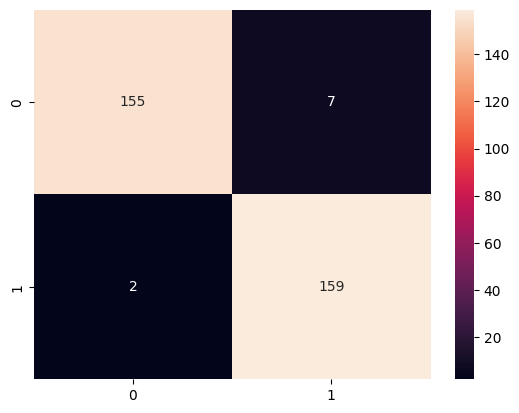

In [22]:
y_predk = knn.predict(X_test)


cm4 = confusion_matrix(y_test, y_predk)

plt.figure()
sns.heatmap(cm4, fmt="d" ,annot=True)


print(f"Accuracy: {accuracy_score(y_test, y_predk)}")
print(f"Precision: {precision_score(y_test, y_predk)}")
print(f"Recall: {recall_score(y_test, y_predk)}")
print(f"F1 score: {f1_score(y_test, y_predk)}")
print(f"Roc-Auc: {roc_auc_score(y_test, y_predk)}")

Encuentre el valor óptimo para k

([<matplotlib.axis.XTick at 0x1f40f76ffd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

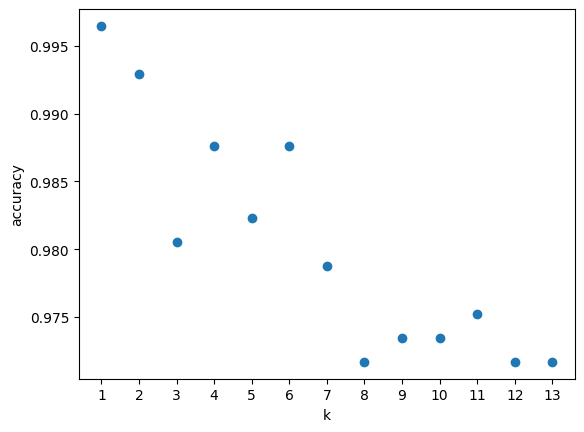

In [23]:
k_range = range(1, 14)
scores = []
for k in k_range:
    clfe = KNeighborsClassifier(n_neighbors = k, metric="hamming") # Se crea el clasificador con el valor de k vecinos
    clfe.fit(X, y) # Se entrena el clasificador con los datos de entrenamiento y sus etiquetas
    scores.append(clfe.score(X, y)) # Se evalua el clasificador con los datos de prueba y sus etiquetas
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores) # Se grafica el valor de k vs el accuracy obtenido
plt.xticks(k_range)

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

Accuracy: 0.9752321981424149
Precision: 0.9636363636363636
Recall: 0.9875776397515528
F1 score: 0.9754601226993865
Roc-Auc: 0.9752703013572579


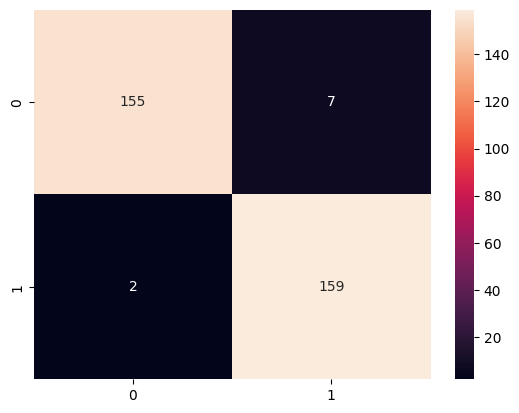

In [24]:
knnopt = KNeighborsClassifier(n_neighbors = 1, metric = "hamming")  #metric = 'Hamming' se utiliza para variables categoricas
knnopt.fit(X_train, y_train)

y_predk2 = knnopt.predict(X_test)


cm5 = confusion_matrix(y_test, y_predk)

plt.figure()
sns.heatmap(cm5, fmt="d" ,annot=True)


print(f"Accuracy: {accuracy_score(y_test, y_predk2)}")
print(f"Precision: {precision_score(y_test, y_predk2)}")
print(f"Recall: {recall_score(y_test, y_predk2)}")
print(f"F1 score: {f1_score(y_test, y_predk2)}")
print(f"Roc-Auc: {roc_auc_score(y_test, y_predk2)}")

#Como es posible ver, el rendimiento en sí no mejoró, solo economizo recursos. Esto se debe a la importancia de solo 1 o 2 variables para la
#predicción del modelo


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

Para mejorar este modelo podria utilizarse un modelo de ensamble como el random forest o XGBoost para tener más presicion a la hora de otorgarle pesos a las variables importantes, lo cual se hará a continuación